<a href="https://colab.research.google.com/github/lerakutt2/myprojects/blob/main/moad5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Дано: данные об объеме продаж в зависимости от бюджета на рекламу на телевидении, радио и в газетах.
Задача: разработать оптимальную модель для прогнозирования объема продаж

In [ ]:
import pandas as pd

df = pd.read_csv('/content/advertising.csv', index_col=0).head(100)
df

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
96,163.3,31.6,52.9,16.9
97,197.6,3.5,5.9,11.7
98,184.9,21.0,22.0,15.5
99,289.7,42.3,51.2,25.4


In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,100.000000,100.000000,100.000000,100.000000
mean,147.165000,24.809000,32.836000,14.463000
std,83.907693,14.491621,21.886048,5.136828
min,5.400000,1.400000,0.300000,4.800000
25%,73.675000,13.650000,16.450000,10.600000
50%,141.100000,26.200000,31.400000,13.300000
75%,216.500000,36.875000,45.925000,18.075000
max,293.600000,49.600000,114.000000,25.400000


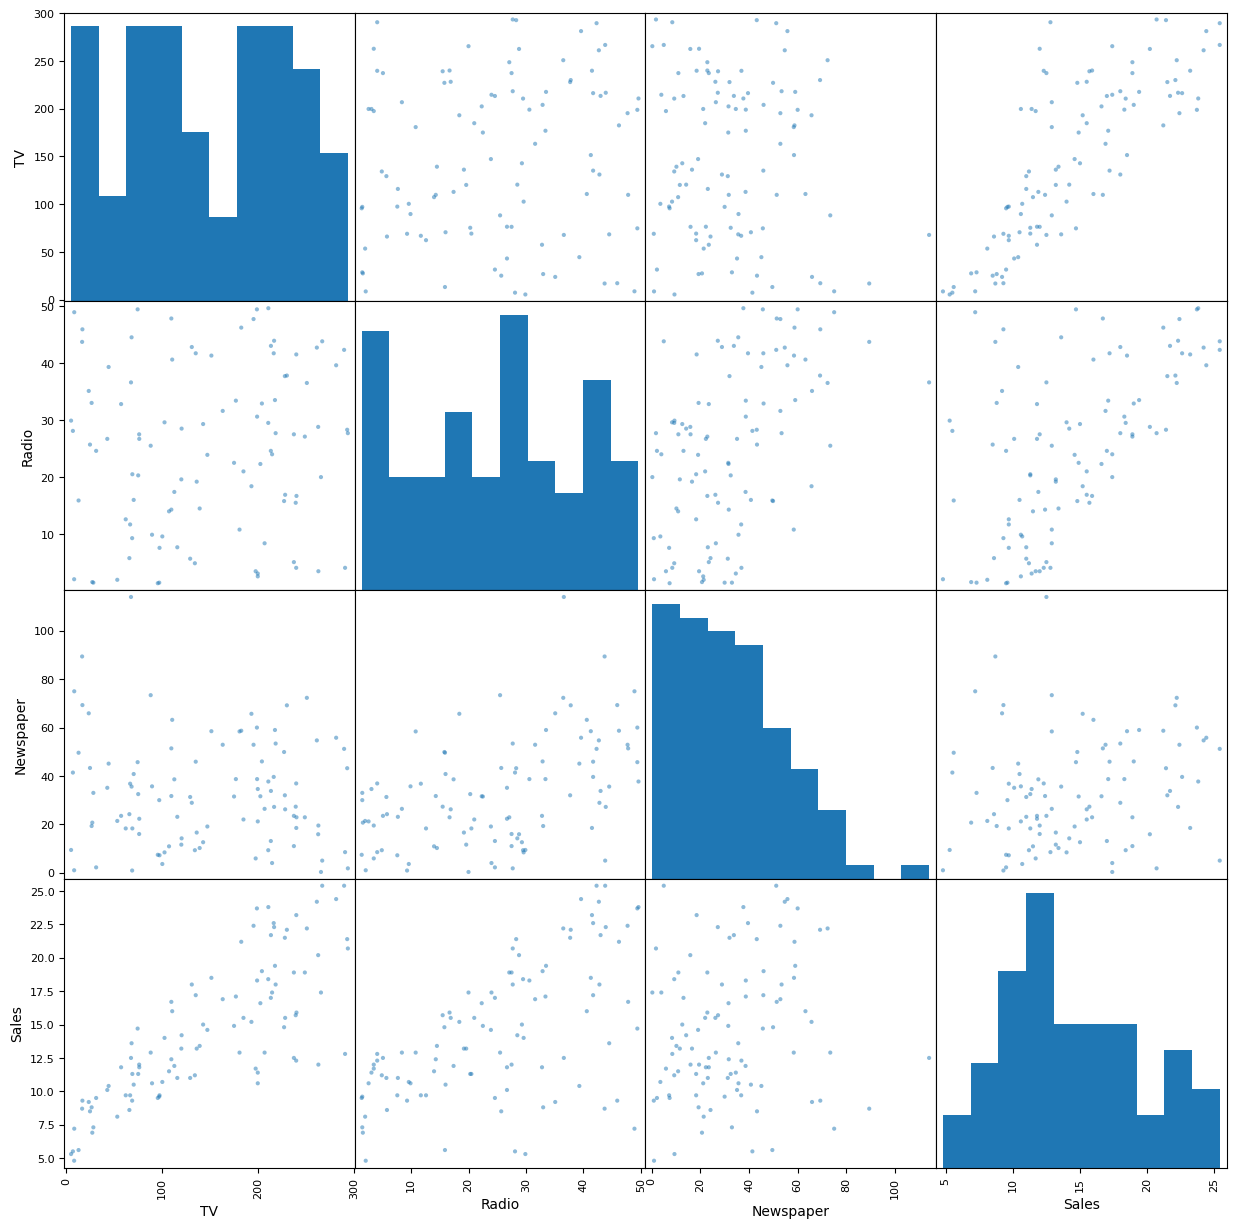

In [ ]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

scatter_matrix(df, figsize=(15, 15))
plt.show()

На целевую переменную (продажи) больше всего влияет реклама на тв и немного реклама на радио. Корреляций признаков не видно.

In [ ]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.101110,-0.072567,0.801522
Radio,0.101110,1.000000,0.482073,0.595167
Newspaper,-0.072567,0.482073,1.000000,0.161847
Sales,0.801522,0.595167,0.161847,1.000000


Те же выводы можно сделать и посмотрев коэффициенты корреляции.

In [ ]:
# разделяем данные на признаки и цель
x = df.iloc[:, 0:3]
y = df.iloc[:, -1]
x, y

(        TV  Radio  Newspaper
 1    230.1   37.8       69.2
 2     44.5   39.3       45.1
 3     17.2   45.9       69.3
 4    151.5   41.3       58.5
 5    180.8   10.8       58.4
 ..     ...    ...        ...
 96   163.3   31.6       52.9
 97   197.6    3.5        5.9
 98   184.9   21.0       22.0
 99   289.7   42.3       51.2
 100  135.2   41.7       45.9
 
 [100 rows x 3 columns],
 1      22.1
 2      10.4
 3       9.3
 4      18.5
 5      12.9
        ... 
 96     16.9
 97     11.7
 98     15.5
 99     25.4
 100    17.2
 Name: Sales, Length: 100, dtype: float64)

In [ ]:
from sklearn.model_selection import train_test_split

# делим на тренировочную и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=5)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


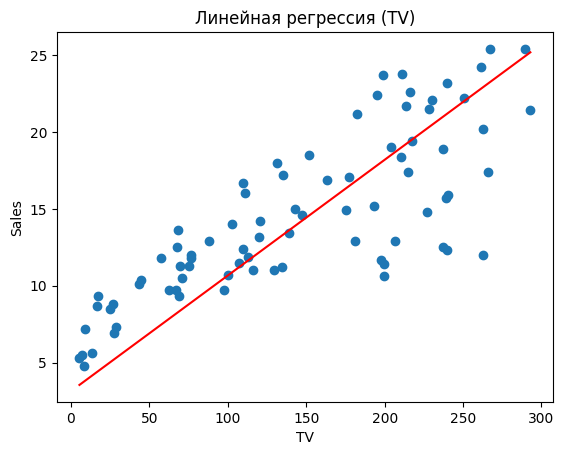

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


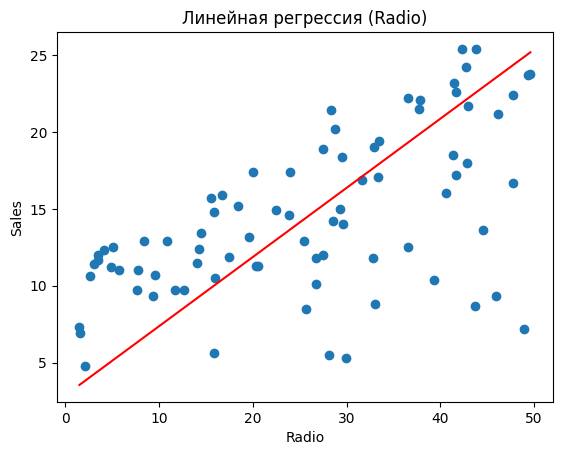

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


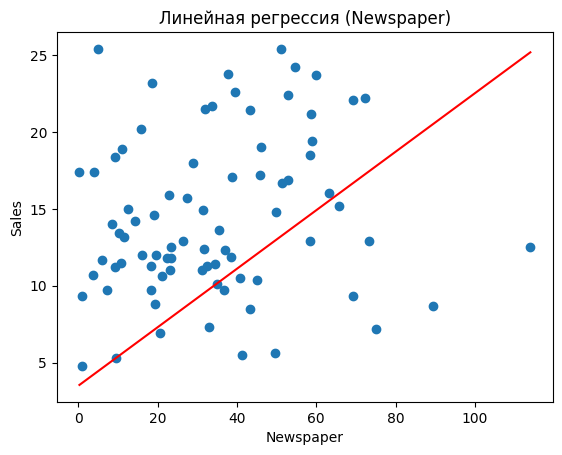

Среднеквадратическая ошибка: 2.5975045520545272
Веса: [ 0.04750112  0.19874545 -0.01394086] 2.9978077885115972


In [ ]:
from sklearn import linear_model
import sklearn.metrics as metrics

skregr = linear_model.LinearRegression()

skregr.fit(x_train, y_train)
columns = x_train.columns

x = np.zeros((len(columns), x_train.shape[0]))
for i in range(len(columns)):
  x[i]= np.linspace(x_train[columns[i]].min(), x_train[columns[i]].max(), x_train.shape[0])

for i in range(len(columns)):
  plt.scatter(x_train[columns[i]], y_train)
  plt.plot(x[i], skregr.predict(np.array([x[0], x[1], x[2]]).transpose()), color='red')
  plt.title('Линейная регрессия (' + columns[i] + ')')
  plt.ylabel('Sales')
  plt.xlabel(columns[i])
  plt.show()

y_pred = skregr.predict(x_test)
mse_linear = metrics.mean_squared_error(y_pred, y_test)
print('Среднеквадратическая ошибка:', metrics.mean_squared_error(skregr.predict(x_test), y_test))
print('Веса:', skregr.coef_, skregr.intercept_)

Получаем уравнение: 0.0475x1 + 0.1987x2 - 0.0139x3 + 2.998

Lasso MSE with Lambda=1e-07 is 2.59750453973195
[ 0.04750112  0.19874545 -0.01394086] 2.997807793670768
Lasso MSE with Lambda=1e-06 is 2.597504428677952
[ 0.04750112  0.19874544 -0.01394085] 2.9978078403450876
Lasso MSE with Lambda=0.0001 is 2.59749222801458
[ 0.04750113  0.19874462 -0.01394041] 2.9978129502040627
Lasso MSE with Lambda=0.005 is 2.5968882154570374
[ 0.04750135  0.19870394 -0.01391832] 2.9980665090136487
Lasso MSE with Lambda=0.01 is 2.596269038824848
[ 0.0475017   0.1986609  -0.01389528] 2.9983306891004418
Lasso MSE with Lambda=0.05 is 2.5913749106496797
[ 0.04750307  0.1983349  -0.01371689] 3.0003787873096393
Lasso MSE with Lambda=0.1 is 2.585304021236886
[ 0.04750478  0.1979274  -0.01349389] 3.0029389100711352
Lasso MSE with Lambda=0.2 is 2.5733181450985105
[ 0.0475082   0.19711239 -0.0130479 ] 3.0080591555941325
Lasso MSE with Lambda=0.3 is 2.5615401392097614
[ 0.04751163  0.19629739 -0.01260191] 3.0131794011171262
Lasso MSE with Lambda=0.4 is 2.5499700035706327
[ 0.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


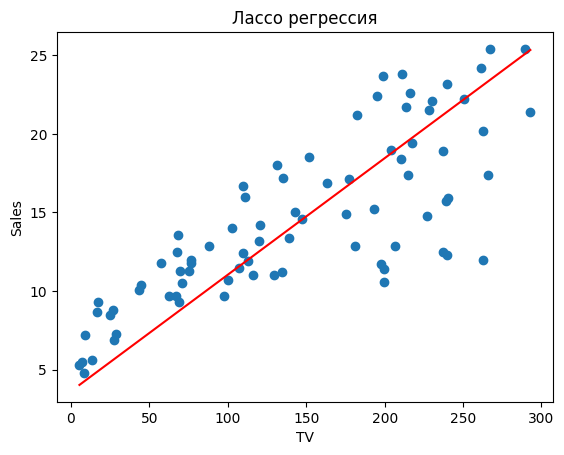

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


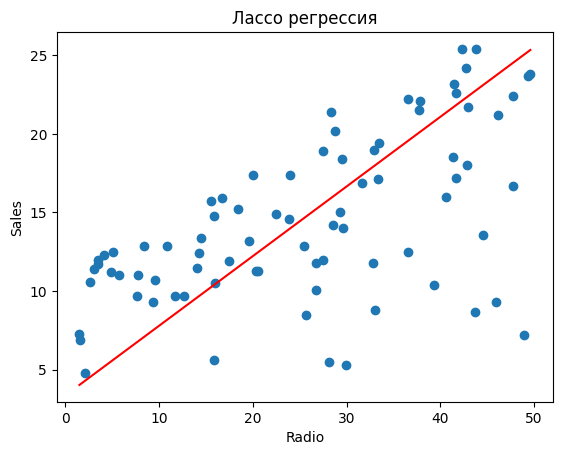

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


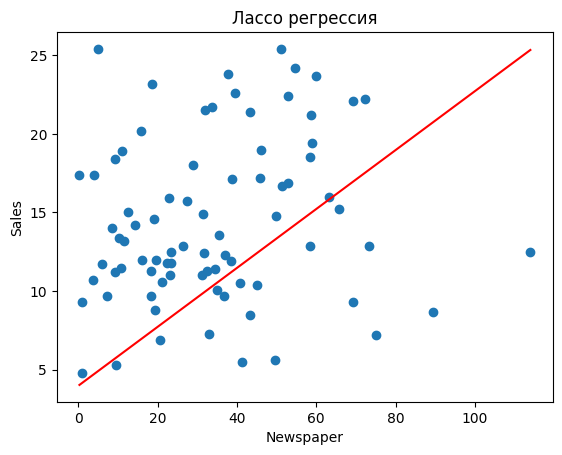

In [ ]:
from sklearn.linear_model import Lasso
import numpy as np

lambda_values = [0.0000001, 0.000001, 0.0001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 50, 100]
min_mse_lasso = 1000
best_lambda = 0

for lambda_val in lambda_values:
  lasso_reg = Lasso(lambda_val)
  lasso_reg.fit(x_train, y_train)
  y_pred = lasso_reg.predict(x_test)
  mse_lasso = metrics.mean_squared_error(y_pred, y_test)
  print(('Lasso MSE with Lambda={} is {}').format(lambda_val, mse_lasso))
  print(lasso_reg.coef_, lasso_reg.intercept_)
  if mse_lasso < min_mse_lasso:
    min_mse_lasso = mse_lasso
    best_lambda = lambda_val

print('Min mse is', min_mse_lasso,', best lambda =', best_lambda)

lasso_reg = Lasso(best_lambda)
lasso_reg.fit(x_train, y_train)
y_pred = lasso_reg.predict(x_test)
y_pred_train = lasso_reg.predict(x_train)

for i in range(len(columns)):
  plt.scatter(x_train[columns[i]], y_train)
  plt.title('Лассо регрессия')
  plt.ylabel('Sales')
  plt.xlabel(columns[i])
  plt.plot(x[i], lasso_reg.predict(np.array([x[0], x[1], x[2]]).transpose()), color='red')
  plt.show()

Получаем уравнение: 0.04738x1 + 0.16x2 + 3.54

Ridge MSE with Lambda=1e-06 is 2.5975045518647235
[ 0.04750112  0.19874545 -0.01394086] 2.9978077887087373
Ridge MSE with Lambda=0.01 is 2.5975026540645185
[ 0.04750112  0.19874529 -0.01394081] 2.997809759903488
Ridge MSE with Lambda=0.05 is 2.5974950622117836
[ 0.04750113  0.19874465 -0.0139406 ] 2.9978176454463767
Ridge MSE with Lambda=0.1 is 2.5974855726372783
[ 0.04750114  0.19874385 -0.01394033] 2.997827502319449
Ridge MSE with Lambda=0.5 is 2.597409665696958
[ 0.04750123  0.19873747 -0.01393823] 2.997906355082689
Ridge MSE with Lambda=1 is 2.597314806157496
[ 0.04750134  0.19872948 -0.0139356 ] 2.998004915483836
Ridge MSE with Lambda=1.5 is 2.597219973430252
[ 0.04750145  0.1987215  -0.01393297] 2.9981034697158098
Ridge MSE with Lambda=3 is 2.596935636063118
[ 0.04750178  0.19869756 -0.01392508] 2.998399095404226
Ridge MSE with Lambda=5 is 2.5965568945885167
[ 0.04750222  0.19866565 -0.01391457] 2.998793176666261
Ridge MSE with Lambda=6 is 2.596367684466304
[ 0.04750244  0.198649

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


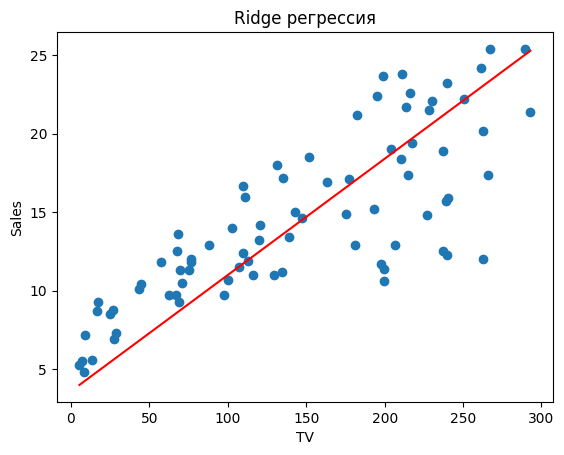

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


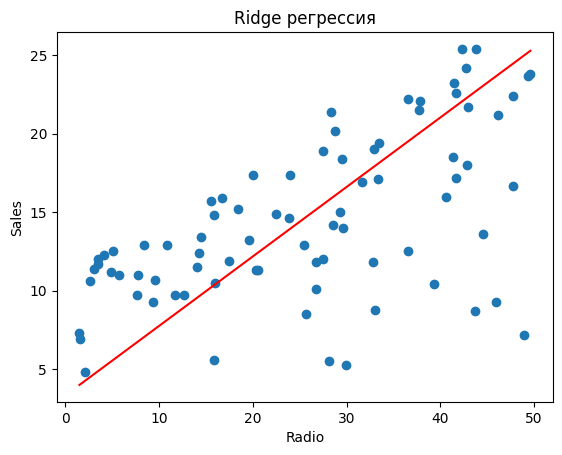

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


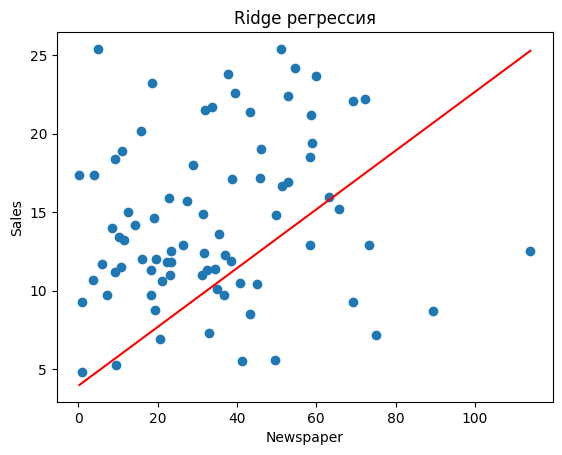

In [ ]:
from sklearn.linear_model import Ridge
# 3
lambda_values = [0.000001, 0.01, 0.05, 0.1, 0.5, 1, 1.5, 3, 5, 6, 7, 8, 9, 10, 13, 17, 25, 100,
                 1000, 2000, 2500, 3000, 3500, 4000, 5000, 5250, 5500, 6000, 7500, 10000]

min_mse_ridge = 1000
best_lambda = 0

for lambda_val in lambda_values:
  ridge_reg = Ridge(lambda_val)
  ridge_reg.fit(x_train, y_train)
  y_pred = ridge_reg.predict(x_test)
  mse_ridge = metrics.mean_squared_error(y_pred, y_test)
  print(('Ridge MSE with Lambda={} is {}').format(lambda_val, mse_ridge))
  print(ridge_reg.coef_, ridge_reg.intercept_)

  if mse_ridge < min_mse_ridge:
    min_mse_ridge = mse_ridge
    best_lambda = lambda_val

print('Min mse is', min_mse_ridge,', best lambda =', best_lambda)

ridge_reg = Ridge(best_lambda)
ridge_reg.fit(x_train, y_train)
y_pred = ridge_reg.predict(x_test)
y_pred_train = ridge_reg.predict(x_train)

for i in range(len(columns)):
  plt.scatter(x_train[columns[i]], y_train)
  plt.title('Ridge регрессия')
  plt.ylabel('Sales')
  plt.xlabel(columns[i])
  plt.plot(x[i], ridge_reg.predict(np.array([x[0], x[1], x[2]]).transpose()), color='red')
  plt.show()

Получаем уравнение: 0.04796x1 + 0.16x2 - 0.002x3 + 3.4998



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


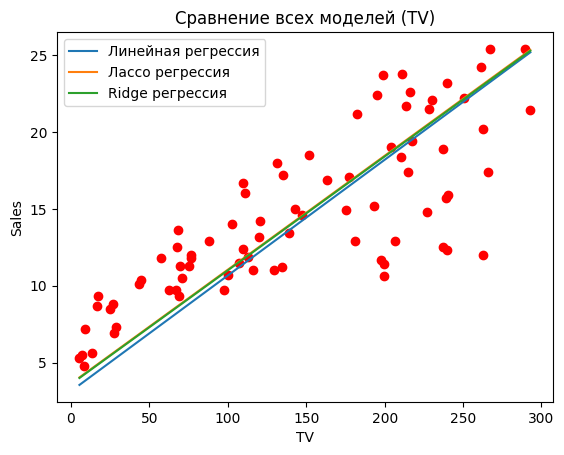

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


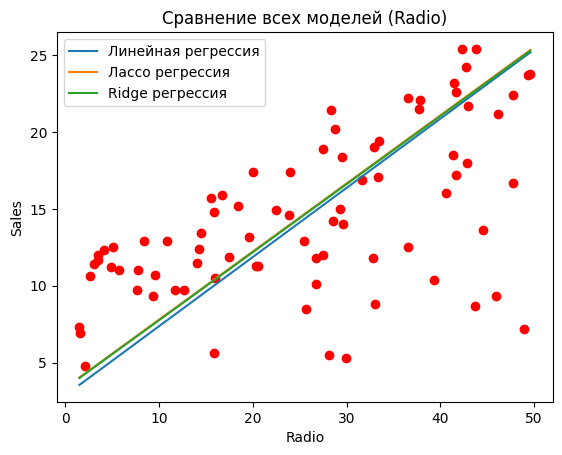

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


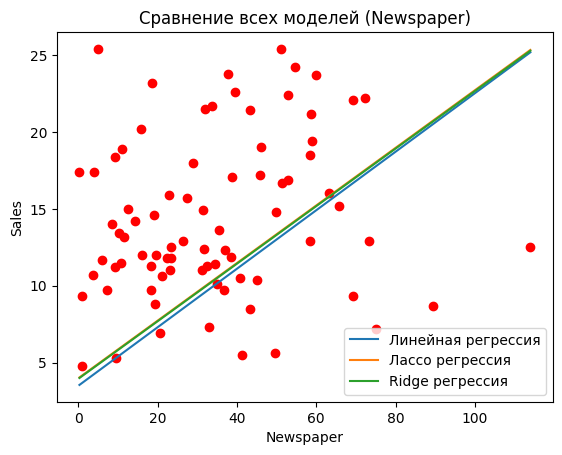

Среднеквадратические ошибки:
Линейная регрессия:  2.5975045520545272
Лассо регрессия:  2.2627513011828353
Ridge регрессия:  2.3576734605822534


In [ ]:
for i in range(len(columns)):
  plt.scatter(x_train[columns[i]], y_train, color='red')
  plt.title('Сравнение всех моделей (' + columns[i] + ')')
  plt.ylabel('Sales')
  plt.xlabel(columns[i])
  plt.plot(x[i], skregr.predict(np.array([x[0], x[1], x[2]]).transpose()), label='Линейная регрессия')
  plt.plot(x[i], lasso_reg.predict(np.array([x[0], x[1], x[2]]).transpose()), label='Лассо регрессия')
  plt.plot(x[i], ridge_reg.predict(np.array([x[0], x[1], x[2]]).transpose()), label='Ridge регрессия')
  plt.legend()
  plt.show()

print('Среднеквадратические ошибки:')
print('Линейная регрессия: ', mse_linear)
print('Лассо регрессия: ', min_mse_lasso)
print('Ridge регрессия: ', min_mse_ridge)

Выводы: наименьшую среднеквадратическую ошибку дает лассо регрессия. Можно сделать вывод о целесообразности исключения признака Newspaper (продажи не зависят от рекламы в газетах)

гридсерч

Ответы на вопросы:

**Существует ли зависимость между размерами рекламного бюджета и объемами продаж?**

Да. Об этом говорит значение коэффициента корреляции рекламного бюджета на тв, большее 0.8.

**Насколько сильна связь между размерами рекламного бюджета и продажами?**

Коэффициенты корреляции продаж и бюджетов рекламы на тв, радио и в газетах равны соответственно 0.801522 (сильная зависимость), 0.595167 (средняя зависимость) и 0.161847 (слабая зависимость). Связь достаточно сильная для построения моделей регрессии.

**Какое средство массовой информации способствует продажам?**

Телевидение (наибольший коэффициент корреляции).

**Насколько точно мы можем оценить влияние каждого СМИ на будущие продажи?**

На целевую переменную (продажи) больше всего влияет реклама на тв и немного реклама на радио.

**Насколько точно мы можем спрогнозировать продажи?**

Среднеквадратическая ошибка, равная 2,26 тысяч долларов, небольшая по сравнению с общими бюджетами на рекламу.

https://habr.com/ru/articles/679232/